## We have a dataset for binary classification.
We will use the sigmoid function and take the likelihood to estimate w and b for out 1 feature binary classification code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
list1=[]
list2=[]
for i in range(1,200):
    prob=1/(1+np.exp(-0.05*i+5))
    list1.append(i)
    print(i,end=" ")
    if(np.random.random()<prob):
        print(1,prob)
        list2.append(1)
    else:
        print(0,prob)
        list2.append(0)


1 0 0.007033587154995161
2 0 0.007391541344281971
3 0 0.007767570078015005
4 0 0.008162571153159897
5 0 0.008577485413711984
6 0 0.009013298652847822
7 0 0.009471043581946108
8 0 0.009951801866904324
9 0 0.010456706231918071
10 0 0.01098694263059318
11 0 0.011543752483922289
12 0 0.012128434984274237
13 0 0.012742349464111609
14 0 0.013386917827664779
15 0 0.014063627043245475
16 0 0.014774031693273055
17 0 0.015519756578408886
18 0 0.016302499371440946
19 0 0.017124033315727736
20 0 0.01798620996209156
21 0 0.01889096193703905
22 0 0.01984030573407751
23 0 0.02083634451868043
24 0 0.021881270936130476
25 1 0.022977369910025615
26 0 0.024127021417669196
27 0 0.02533270322687173
28 0 0.026596993576865863
29 0 0.027922573784073024
30 0 0.02931223075135632
31 0 0.030768859357148008
32 0 0.032295464698450516
33 0 0.03389516415917816
34 0 0.03557118927263618
35 0 0.03732688734412946
36 0 0.039165722796764356
37 0 0.041091278200465015
38 0 0.04310725494108614
39 0 0.045217473483287494
40 0 0

# Theory for map
$p(y_i|w,b)=\prod p^{y_i}(1-p)^{1-y_i}$\
where $p=\frac 1 {1+e^{-wx+b}}$\
We can calculate the partial derivatives of the negative log likelihood to obtain the loss functions\
$d(-log(p(y)))/dw=\sum(\frac {-e^{-wx+b}}{1+e^{-wx+b}}x_{i}+(1-y_i)x_{i})$\
$d(-log(p(y)))/db=\sum(\frac {e^{-wx+b}}{1+e^{-wx+b}}-(1-y_i))$

We set a prior of N(w,0.1) for w and a prior of N(b,3) for b\
$
p_{posterior}=p_{prior}(\theta)l(\theta)$\
Now we can use the negative log likelihood functions, multiply it with the prior, and minimise it to get the posterior.


In [100]:
wprior=0
bprior=1
sigma_w=0.1
sigma_b=3
def MAP(x,y,w,b,L1,L2):
    grad_w=0
    grad_b=0
    for i in range(len(x)):
        coeff=np.exp(-w*x[i]+b)/(1+np.exp(-w*x[i]+b))
        grad_w+=-coeff*x[i]+(1-y[i])*x[i]
        grad_b+=coeff-(1-y[i])
    prior_w=np.exp(-(wprior-w)**2/(2*(sigma_w**2)))/(np.sqrt(2*np.pi)*sigma_w)
    prior_b=np.exp(-(bprior-b)**2/(2*(sigma_b**2)))/(np.sqrt(2*np.pi)*sigma_b)
    return w-grad_w*prior_w*L1,b-grad_b*prior_b*L2

In [101]:
w=0
b=1
x=np.array(list1)
y=np.array(list2)
L1=10**(-7)
L2=10**(-2)
epochs=10000

In [102]:
for i in range(epochs):
    w,b=MAP(x,y,w,b,L1,L2)
    print(w,b)

0.0035609850112502607 0.9381896688102355
0.006185471145157663 0.9004310976410698
0.00805743607797964 0.8818030906691671
0.009412113745381223 0.8763656905753758
0.010423761486902874 0.8796985942690214
0.01120496414898168 0.8889007122453768
0.011827516417749567 0.9020907380052039
0.012338206934614432 0.9180241260125458
0.01276839346719126 0.9358563956465556
0.01313964189462685 0.9550011438659823
0.013467108983093222 0.9750433705484021
0.013761635980027035 0.9956849639591974
0.014031087249640486 1.0167093290264095
0.014281232291812175 1.0379577717462471
0.014516342346686213 1.059313337213607
0.01473960301619919 1.080689515944286
0.01495340496652456 1.1020222151872157
0.015159551870195898 1.123263970687822
0.015359411001613019 1.1443797259965445
0.015554023402011233 1.165343726427106
0.015744185127114552 1.18613721627761
0.015930507565542408 1.2067467212782126
0.016113462461582708 1.2271627612274982
0.016293415670385822 1.2473788811544269
0.016470652558737458 1.2673909197278528
0.016645397

In [103]:
def sigmoidf(x):
    a=[]
    for i in x:
        a.append(1/(1+np.exp(-w*i+b)))
    # print(a)
    return a

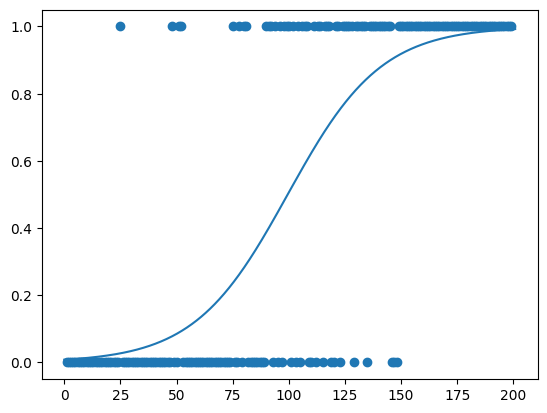

In [104]:
plt.scatter(x,y)
l1=np.arange(0,201,0.2)
sig=sigmoidf(l1)
plt.plot(l1,sig)
plt.show()